In [92]:
import pandas as pd
import seaborn as sns
sns.set_theme()

In [93]:
df = pd.read_excel("PythonData.xlsx")
df

,Member No,Node No,Location,N,Vy,Vz,MT,My,Mz,Load Case,Dimension,Youngs Modulus
0,1,300,4.6,-2928.489990,8.778454,0.892048,-0.249575,-1.025051,-17.442640,CO26,600,35000
1,1,120,0.0,-4822.660156,10.152081,0.235728,-0.055108,-3.184998,16.718340,CO4,600,35000
2,1,120,0.0,-4248.632812,11.871040,1.648077,-0.230939,-8.321428,28.161261,CO29,600,35000
3,1,120,0.0,-3025.364014,5.827210,-0.400866,-0.063779,-0.067265,9.604002,CO1,600,35000
4,1,120,0.0,-3034.101074,7.725086,2.312005,-0.073938,-9.324522,17.851429,CO24,600,35000
...,...,...,...,...,...,...,...,...,...,...,...,...
283,57,141,0.0,-716.064148,1.024504,4.579179,-0.012922,-7.306011,2.346141,CO20,350,52500
284,57,320,4.6,-1110.030029,0.929780,7.805616,0.000662,23.632278,-2.346262,CO5,350,52500
285,57,141,0.0,-1126.427979,0.929780,7.805616,0.000662,-12.273560,1.930728,CO5,350,52500
286,57,141,0.0,-1004.807007,1.218730,6.976114,-0.006631,-11.134660,2.715901,CO29,350,52500


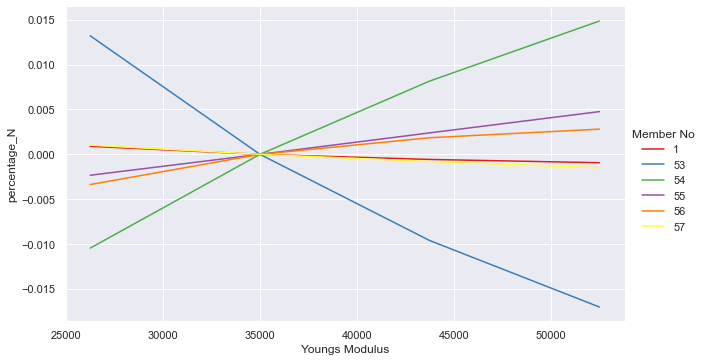

In [94]:
df_max_N = df.groupby(['Member No', 'Youngs Modulus'], as_index=False)['N'].min()

base_N = {
    member: df_max_N[(df_max_N["Member No"] == member) & (df_max_N["Youngs Modulus"] == 35e3)]["N"].iloc[0]
    for member in df_max_N["Member No"].unique()
}
df_max_N["base_N"] = [base_N[member] for member in df_max_N['Member No']]

df_max_N['percentage_N'] = (df_max_N['N'] - df_max_N['base_N']) / df_max_N['base_N'].abs()
df_max_N['abs_N'] = (df_max_N['N'] - df_max_N['base_N'])

sns.relplot(
    data=df_max_N,
    kind="line",
    x="Youngs Modulus",
    y="percentage_N",
    hue="Member No",
    palette="Set1",
    aspect=1.75
)


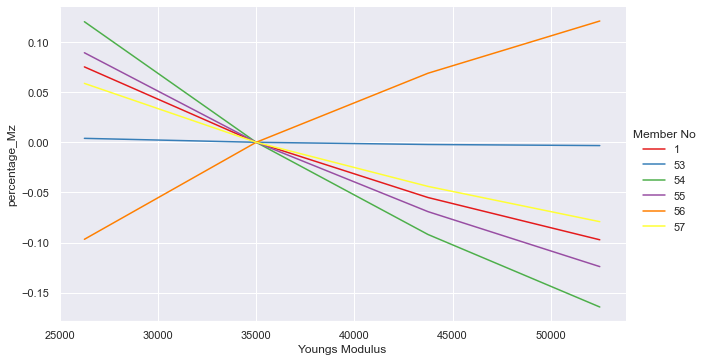

In [136]:
df['abs_Mz'] = df['Mz'].abs()
df_max_Mz= df.groupby(['Member No', 'Youngs Modulus'], as_index=False)['abs_Mz'].max()
#df_max_Mz

base_Mz = {
    member: df_max_Mz[(df_max_Mz["Member No"] == member) & (df_max_Mz["Youngs Modulus"] == 35e3)]["abs_Mz"].iloc[0]
    for member in df_max_Mz["Member No"].unique()
}
df_max_Mz["base_Mz"] = [base_Mz[member] for member in df_max_Mz['Member No']]

df_max_Mz['percentage_Mz'] = (df_max_Mz['abs_Mz'] - df_max_Mz['base_Mz']) / df_max_Mz['base_Mz'].abs()
#df_max_Mz['abs_Mz'] = (df_max_Mz['abs_Mz'] - df_max_Mz['base_Mz'])

sns.relplot(
    data=df_max_Mz,
    kind="line",
    x="Youngs Modulus",
    y="percentage_Mz",
    hue="Member No",
    palette="Set1",
    aspect=1.75
)


<AxesSubplot:xlabel='Youngs Modulus', ylabel='N'>

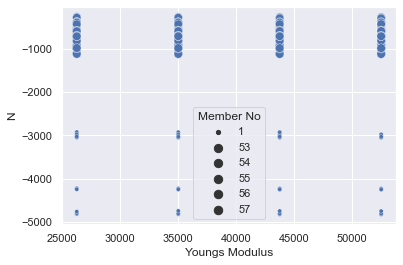

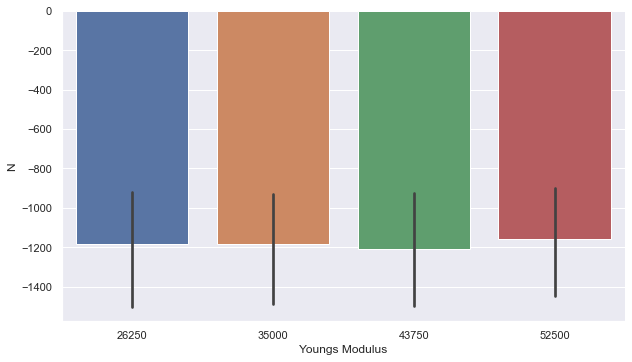

In [109]:
sns.catplot(
    data=df,
    kind='bar',
    x='Youngs Modulus',
    y='N',
    aspect=1.75
)

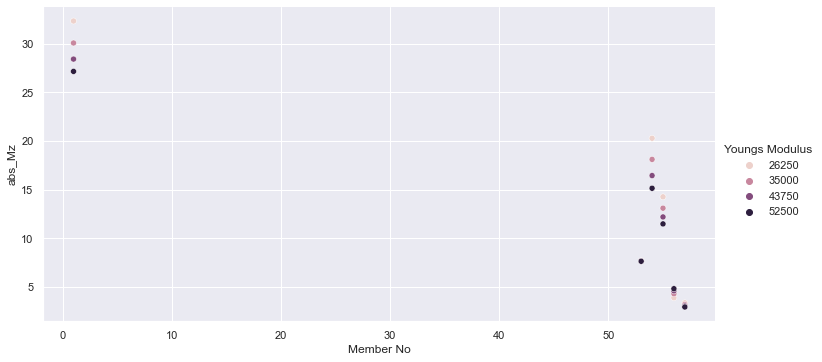

In [138]:
sns.relplot(
    data=df_max_Mz,
    x='Member No',
    y='abs_Mz',
    hue='Youngs Modulus',
    aspect=2.0
)